#Esempio di fit con una retta per il filtro RC

Codice di M.Francesconi e C.Roda

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
print('ok')

ok


In [6]:
# function used for fit
# parameters: x, array of points for function evaluation
#             value, parameter to be used as value
# return val: NumPy array with same length of x
def my_constant_func(x, value):
    returnval = np.full_like(x, value)
    return returnval

In [7]:
# open file and fill freq and ampl
file_path = 'RC.csv'
with open(file_path, newline='') as csvfile:
    # convert csv removing comments and empty lines
    reader = csv.DictReader(filter(lambda row: (row[0]!='#' and row[0]!='\n'and row[0]!='\r'), csvfile))

    # transform enumerator to list
    data = list(reader)

    # print data in reader
    #for row in reader:
    #    print(row['Frequency (Hz)'] + " " + row['Channel 2 Magnitude (dB)'] + "\n");

    # convert list of dictionaries to NumPy arrays, only for fields of interest
    freq = np.array([float(row['Frequency (Hz)']) for row in data])
    ampl = np.array([float(row['Channel 2 Magnitude (dB)']) for row in data])

    # print converted values
    #for f, a in zip(freq, ampl):
    #    print(str(f) + " "+ str(a) + "\n");

In [9]:
# create array of Y-error
ampl_error = np.array([0.01 for value in ampl]);

Stimate l'errore sull'ampiezza, può essere una funzione del valore stesso dell'ampiezza

In [10]:
# select elements to be used in fit:
# cut only items below 800 Hz 
freq_fit = freq[freq < 800.];
ampl_fit = ampl[freq < 800.];
ampl_error_fit = ampl_error[freq < 800.]

Aggiustate il range di fit in base ai vostri dati sperimentali

In [ ]:
# fit ampl-freq with errors ampl_error using my_contant_func, note absolute_sigma
# starting parameters value=0dB
params, params_covariance = optimize.curve_fit(my_constant_func, freq_fit, ampl_fit, p0=[0], sigma=ampl_error_fit, absolute_sigma=True)

# print fitted values with errors obtained from diagonal elements of covariance matrix
print("fitted values:\n")
print("value: ", params[0], " +/- ", np.sqrt(params_covariance[0][0]), " dB\n")

#print actual covariance matrix
print("covariance matrix:\n");
print(params_covariance, "\n")

# evaluate function for points in fit and compute chi2 and ndf
best_fit = my_constant_func(freq_fit, params[0])
chi_square = (((ampl_fit - best_fit)/ampl_error_fit)**2).sum()
print("chi2/ndf = ", chi_square, "/", len(freq_fit)-len(params));

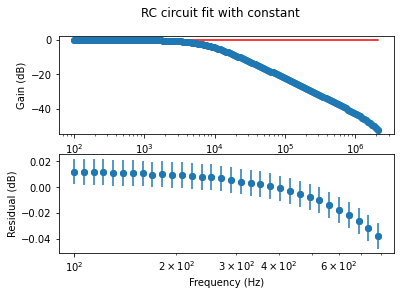

In [12]:
# plot data with error bar and fitted function
fig, axs = plt.subplots(2)
fig.suptitle('RC circuit fit with constant')
axs[0].set_xscale('log') #log scale
axs[0].set_ylabel('Gain (dB)')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].scatter(freq, ampl, label="Data")
axs[0].errorbar(freq, ampl, yerr=ampl_error, fmt="o")
axs[0].plot(freq, my_constant_func(freq, params[0]), label='Fitted function', color="red")

# plot residuals on fit range
axs[1].set_xscale('log') #log scale
axs[1].set_ylabel('Residual (dB)')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].scatter(freq_fit, ampl_fit-best_fit)
axs[1].errorbar(freq_fit, ampl_fit-best_fit, yerr=ampl_error_fit, fmt="o")

#plt.tight_layout() # axis labels may be outside plot without this
plt.show()